# Do blocking statistics for everything

In [6]:
# Imports
import numpy as np
from matplotlib import pyplot as plt
from vmc.interface import PyHarmonicOscillator, PyImportanceMetropolis,\
    PySimpleGaussian, PySampler

## Step One: A Trip to Monaco
In a sentence: get the local energy arrays

In [62]:
# Natural units
mass = 1.0
omega = 1.0
hbar = 1.0

In [70]:
num_alphas = 11
alphas = np.linspace(0.3, 0.7, num_alphas)
step_length = 0.5
num_particles = 10
num_dimensions = 3
num_parameters = 1

In [85]:
solver = PyImportanceMetropolis()
wavefunction = PySimpleGaussian(num_particles, num_dimensions,\
                    mass, omega, spread=step_length)
hamiltonian = PyHarmonicOscillator()
sampler = PySampler(wavefunction, hamiltonian, solver)

In [72]:
number_of_samples = 2**21

In [86]:
# Storage, boooiii (num_alphas) x (num_samples)
energies = np.zeros((num_alphas, number_of_samples))

In [87]:
iteration = 0
for alpha in alphas:
    
    # Setting alpha
    wavefunction.set_parameters(np.array([alpha]))
    # Monte Carlo cycles
    sampler.sample(number_of_samples, step_length,\
            num_thermalization_steps=number_of_samples*0.15,\
            sample_local_energies=True)
    
    # Get entire local energy array
    energies[iteration] = sampler.get_local_energies()
    
    # Redistribute and update
    wavefunction.redistribute()
    iteration += 1

[ 17.33083946  16.77522358  16.49884125 ...,  18.23116115  18.2495983
  17.82966906]
[ 16.34107057  16.51422603  16.13859011 ...,  17.01127668  16.70344106
  16.74186269]
[ 15.91559574  17.07683191  16.44506101 ...,  15.29982485  15.31556769
  15.31618068]
[ 14.77455595  14.39367307  14.39775112 ...,  14.68857965  14.68857965
  14.83794816]
[ 14.96596383  14.96596383  14.93205287 ...,  15.01881473  14.90323937
  14.93391734]
[ 15.  15.  15. ...,  15.  15.  15.]
[ 15.13461916  15.19116954  15.12472322 ...,  14.68974718  14.67462807
  14.5675938 ]
[ 14.62392285  14.63405938  14.69264264 ...,  13.97880625  14.18835262
  14.17918249]
[ 15.026266    14.78993244  14.59692883 ...,  16.37674817  16.85810161
  16.92139542]
[ 15.57558623  15.74097167  15.74849815 ...,  14.71015337  14.75968618
  14.68150452]
[ 14.48383706  15.89176034  15.00929536 ...,  17.12120614  17.05476793
  16.83145267]


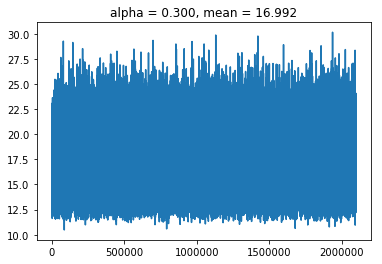

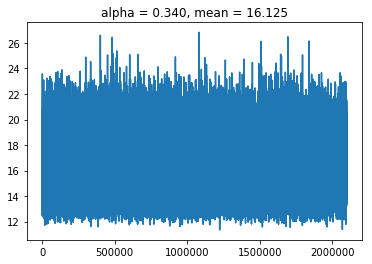

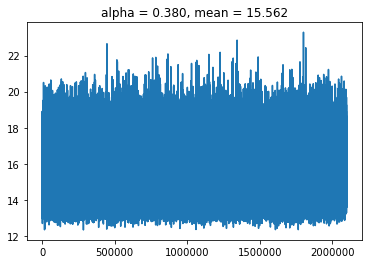

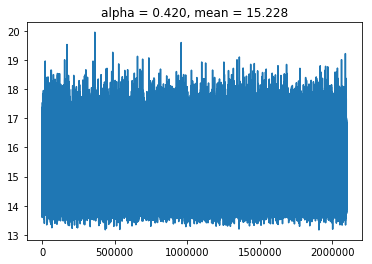

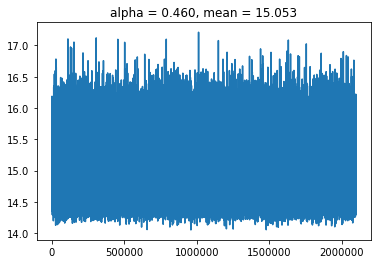

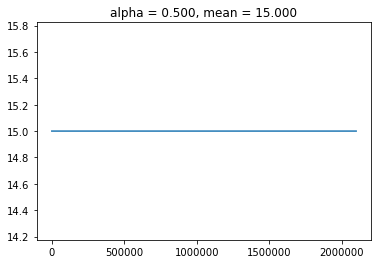

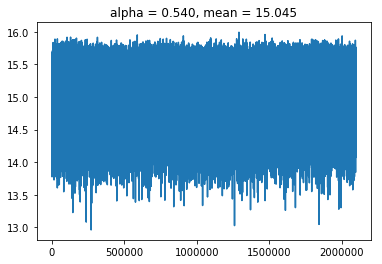

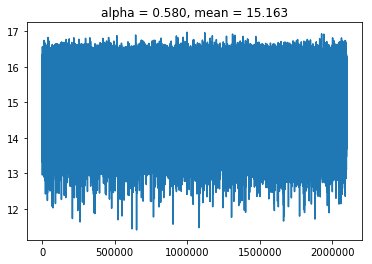

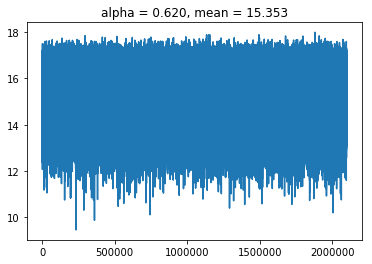

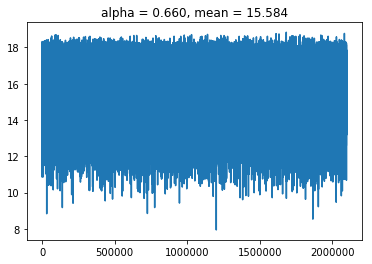

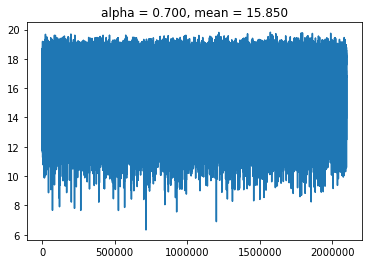

In [88]:
# We like to have fun around here
the_correct_index = int(*np.where((alphas > 0.499) & (alphas < 0.501)))
for i in range(num_alphas):
    plt.figure()
    plt.plot(energies[i, :])
    plt.title("alpha = {:4.3f}, mean = {:5.3f}".format(alphas[i], np.mean(energies[i, :])))
plt.show()

## Step one and a half: Blocking

In [47]:
import sys

In [51]:
sys.path.insert(0, '../vmc_hybrid/scripts/')

In [53]:
import blocking

In [92]:
for i in range(num_alphas):
    print("alpha = {:4.2}".format(alphas[i]))
    blocking.block(energies[i, :])

alpha =  0.3
Runtime:  0.112225771 seconds
Mean: 16.99230, Iterations: 9, STD.  0.00872
alpha = 0.34
Runtime:  0.111150742 seconds
Mean: 16.12454, Iterations: 8, STD.  0.00610
alpha = 0.38
Runtime:  0.090834856 seconds
Mean: 15.56158, Iterations: 8, STD.  0.00418
alpha = 0.42
Runtime:  0.092564106 seconds
Mean: 15.22829, Iterations: 9, STD.  0.00266
alpha = 0.46
Runtime:  0.095291138 seconds
Mean: 15.05273, Iterations: 8, STD.  0.00120
alpha =  0.5
More data is needed!
Runtime:  0.091917992 seconds
Mean: 15.00000, Iterations: 20, STD.  0.00000
alpha = 0.54
Runtime:  0.089965820 seconds
Mean: 15.04457, Iterations: 12, STD.  0.00113
alpha = 0.58


../vmc_hybrid/scripts/blocking.py:44: RuntimeWarning: invalid value encountered in true_divide
  factor_1 = (gamma/s)**2


Runtime:  0.092046976 seconds
Mean: 15.16269, Iterations: 9, STD.  0.00214
alpha = 0.62
Runtime:  0.095395803 seconds
Mean: 15.35335, Iterations: 8, STD.  0.00303
alpha = 0.66
Runtime:  0.091145039 seconds
Mean: 15.58434, Iterations: 8, STD.  0.00390
alpha =  0.7
Runtime:  0.092613697 seconds
Mean: 15.85001, Iterations: 9, STD.  0.00491
